**Real-Time Communication System Powered by AI for Specially Abled Project**


**Image Preprocessing**

**Import ImageDataGenerator Library And Configure It**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

**Apply ImageDataGenerator Functionality To Train And Test Set**

In [6]:
x_train=train_datagen.flow_from_directory(r"C:\Users\Acer\Downloads\conversation engine for deaf and dumb\Dataset\training_set",target_size=(64,64),
                                          class_mode="categorical",batch_size=30)

Found 15750 images belonging to 9 classes.


In [7]:
x_test=test_datagen.flow_from_directory(r"C:\Users\Acer\Downloads\conversation engine for deaf and dumb\Dataset\test_set",target_size=(64,64),
                                                            class_mode="categorical",batch_size=30)

Found 2250 images belonging to 9 classes.


**Model Building**

**Import The Required Model Building Libraries**

In [8]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

**Initialize The Model**

In [9]:
model=Sequential()

**Add The Convolution Layer**

In [10]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
#No of feature detectors, size of feature detector, image size, activation function

**Add The Pooling Layer**

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

**Add The Flatten Layer**

In [13]:
model.add(Flatten())

**Adding The Dense Layers**

In [14]:
model.add(Dense(200,activation='relu'))

In [15]:
model.add(Dense(200,activation='relu'))

In [16]:
model.add(Dense(9,activation="softmax"))

**Compile The Model**

In [18]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [19]:
len(x_train)

525

In [20]:
len(x_test)

75

**Fit And Save The Model**
Fit the neural network model with the train and test set, number of epochs, and validation steps.
The weights are to be saved for future use. The weights are saved in signlanguage.h5 file using save().

In [21]:
model.fit(x_train,epochs=9,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/9
525/525 [==============================] - 329s 616ms/step - loss: 0.3160 - accuracy: 0.8886 - val_loss: 0.1389 - val_accuracy: 0.9644
Epoch 2/9
525/525 [==============================] - 251s 478ms/step - loss: 0.0592 - accuracy: 0.9810 - val_loss: 0.2418 - val_accuracy: 0.9662
Epoch 3/9
525/525 [==============================] - 271s 515ms/step - loss: 0.0345 - accuracy: 0.9886 - val_loss: 0.2308 - val_accuracy: 0.9680
Epoch 4/9
525/525 [==============================] - 240s 457ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.1640 - val_accuracy: 0.9711
Epoch 5/9
525/525 [==============================] - 217s 412ms/step - loss: 0.0258 - accuracy: 0.9914 - val_loss: 0.0888 - val_accuracy: 0.9769
Epoch 6/9
525/525 [==============================] - 267s 509ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.2250 - val_accuracy: 0.9782
Epoch 7/9
525/525 [==============================] - 344s 655ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.1629 - val_ac

In [22]:
model.save("signlanguage-new.h5")

**Test The Model**

**Import The Packages And Load The Saved Model**

In [2]:
from keras.models import load_model
import numpy as np
import cv2

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [4]:
model=load_model("signlanguage.h5")


**Load The Test Image, Pre-Process It And Predict**

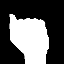

In [5]:
img=image.load_img("16.png",target_size=(64,64))
img

In [6]:
type(img)

PIL.Image.Image

In [7]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [8]:
x.shape

(64, 64, 3)

In [9]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [10]:
pred_prob = model.predict(x)

1/1 [==============================] - 1s 1s/step


In [11]:
pred_prob

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred_prob.argmax(axis=1)[0]

In [13]:
pred_id

0

In [14]:
print("the alphabet is  ",str(class_name[pred_id]))

the alphabet is   A
